# Prophet

- FB Prophet - Gives you cool visuals, stats... It's a super powerful tool, and has great documentation.

In [1]:
import pandas as pd

df = pd.read_csv('stock_px.csv', names= ['Timestamp', 'Apple', 'Microsoft', 'Exxon', 'S&P500'], skiprows=1)
df.head(5)

,Timestamp,Apple,Microsoft,Exxon,S&P500
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [3]:
type(df['Timestamp'][0])

str

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [5]:
df['Timestamp'][0]

Timestamp('2003-01-02 00:00:00')

In [6]:
type(df['Timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Prophet needs a dataframe with 2 columns:
- **ds** - pandas timestamps/datetime objects
- **y** - the actual values/series that you want to predict

In [7]:
df.head()

,Timestamp,Apple,Microsoft,Exxon,S&P500
0,2003-01-02,7.40,21.11,29.22,909.03
1,2003-01-03,7.45,21.14,29.24,908.59
2,2003-01-06,7.45,21.52,29.96,929.01
3,2003-01-07,7.43,21.93,28.95,922.93
4,2003-01-08,7.28,21.31,28.83,909.93


In [8]:
df_apple = df[['Timestamp', 'Apple']]
df_apple.head()

,Timestamp,Apple
0,2003-01-02,7.40
1,2003-01-03,7.45
2,2003-01-06,7.45
3,2003-01-07,7.43
4,2003-01-08,7.28


In [9]:
df_apple = df_apple.rename(columns={'Timestamp': 'ds', 'Apple': 'y'})
df_apple.head()

,ds,y
0,2003-01-02,7.40
1,2003-01-03,7.45
2,2003-01-06,7.45
3,2003-01-07,7.43
4,2003-01-08,7.28


### Now let's use Prophet!

In [10]:
from fbprophet import Prophet

#similar to statsmodel.X import ARIMA

In [11]:
m = Prophet()

In [12]:
m.fit(df_apple)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [16]:
m.make_future_dataframe(periods=30).head()

,ds
0,2003-01-02
1,2003-01-03
2,2003-01-06
3,2003-01-07
4,2003-01-08


In [17]:
future = m.make_future_dataframe(periods=150, include_history=False)

- Now that we have our future dataframe we can perform our prediction for our future df!

In [18]:
forecast = m.predict(future)

In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-10-15,398.968906,386.742426,413.380591,398.968906,398.968906,0.566349,0.566349,0.566349,-0.577537,-0.577537,-0.577537,1.143886,1.143886,1.143886,0.0,0.0,0.0,399.535254
1,2011-10-16,399.264050,387.121762,414.030299,399.264050,399.264050,1.148303,1.148303,1.148303,-0.577536,-0.577536,-0.577536,1.725839,1.725839,1.725839,0.0,0.0,0.0,400.412353
2,2011-10-17,399.559195,388.520555,415.935741,399.559195,399.559195,2.444449,2.444449,2.444449,0.122035,0.122035,0.122035,2.322414,2.322414,2.322414,0.0,0.0,0.0,402.003644
3,2011-10-18,399.854339,389.090053,417.366499,399.854339,399.854339,3.058183,3.058183,3.058183,0.134245,0.134245,0.134245,2.923938,2.923938,2.923938,0.0,0.0,0.0,402.912523
4,2011-10-19,400.149484,389.374966,418.021496,400.149484,400.149484,3.895397,3.895397,3.895397,0.374804,0.374804,0.374804,3.520593,3.520593,3.520593,0.0,0.0,0.0,404.044881


In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2011-10-15,399.535254,386.742426,413.380591
1,2011-10-16,400.412353,387.121762,414.030299
2,2011-10-17,402.003644,388.520555,415.935741
3,2011-10-18,402.912523,389.090053,417.366499
4,2011-10-19,404.044881,389.374966,418.021496


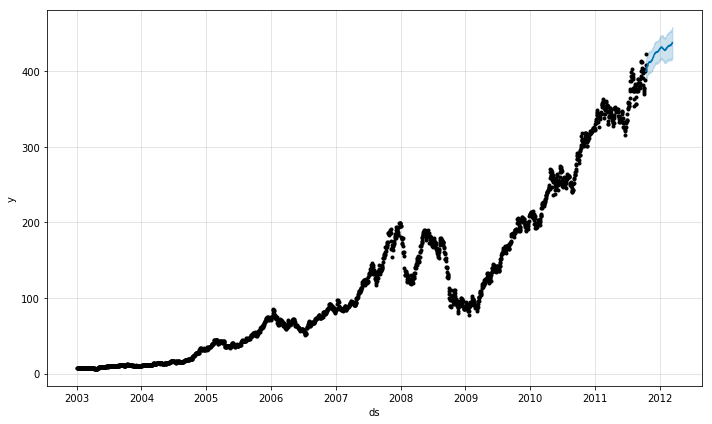

In [24]:
# The blue part is the actual forecast
fig = m.plot(forecast)
None

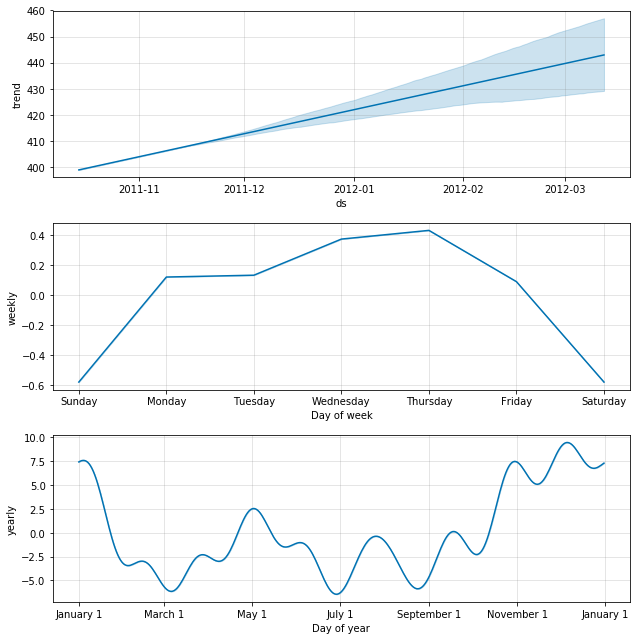

In [25]:
m.plot_components(forecast)
None

### What if I want to train my model on the last 1000 days?

In [26]:
m = Prophet()
m.fit(df_apple.tail(1000)) 
#if I only want to train on the last 1000 days

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=30, include_history=False) 
#predict 30 days into the future

In [28]:
forecast = m.predict(future)

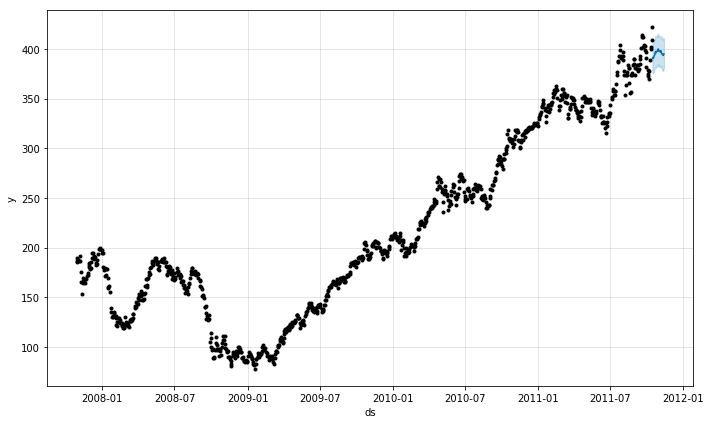

In [29]:
fig = m.plot(forecast)

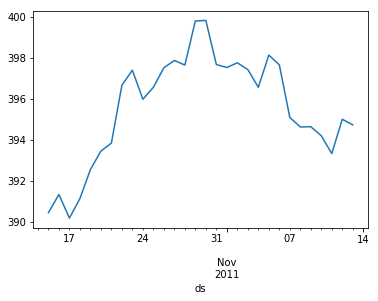

In [30]:
forecast.set_index('ds')['yhat'].plot()

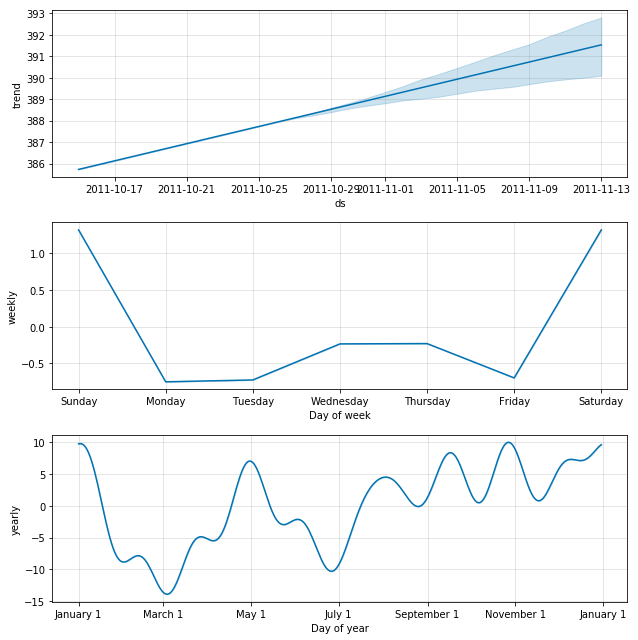

In [31]:
m.plot_components(forecast)
None